In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
 
from sklearn.linear_model import LinearRegression

In [4]:
pd_frame = pd.read_csv("CarPrice.csv",names=['symbolling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','hoursepower','peak_rmp','city_mgp','highway_mgp','price'])

In [5]:
pd_frame

,symbolling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,hoursepower,peak_rmp,city_mgp,highway_mgp,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [6]:
pd_frame.describe()

,symbolling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mgp,highway_mgp
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [7]:
pd_frame.dtypes

symbolling             int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
hoursepower           object
peak_rmp              object
city_mgp               int64
highway_mgp            int64
price                 object
dtype: object

In [8]:
pd_frame.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
symbolling,3,3,1,2,2,2,1,1,1,0
normalized_losses,?,?,?,164,164,?,158,?,158,?
make,alfa-romero,alfa-romero,alfa-romero,audi,audi,audi,audi,audi,audi,audi
fuel_type,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std,std,std,std,turbo,turbo
num_of_doors,two,two,two,four,four,two,four,four,four,two
body_style,convertible,convertible,hatchback,sedan,sedan,sedan,sedan,wagon,sedan,hatchback
drive_wheels,rwd,rwd,rwd,fwd,4wd,fwd,fwd,fwd,fwd,4wd
engine_location,front,front,front,front,front,front,front,front,front,front
wheel_base,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5


In [9]:
pd_frame = pd_frame.drop('make',axis=1)

In [10]:
pd_frame.head(3).transpose()

,0,1,2
symbolling,3,3,1
normalized_losses,?,?,?
fuel_type,gas,gas,gas
aspiration,std,std,std
num_of_doors,two,two,two
body_style,convertible,convertible,hatchback
drive_wheels,rwd,rwd,rwd
engine_location,front,front,front
wheel_base,88.6,88.6,94.5
length,168.8,168.8,171.2


In [11]:
pd_frame = pd_frame.drop('fuel_type',axis=1)

In [12]:
pd_frame.head(3).transpose()

,0,1,2
symbolling,3,3,1
normalized_losses,?,?,?
aspiration,std,std,std
num_of_doors,two,two,two
body_style,convertible,convertible,hatchback
drive_wheels,rwd,rwd,rwd
engine_location,front,front,front
wheel_base,88.6,88.6,94.5
length,168.8,168.8,171.2
width,64.1,64.1,65.5


In [13]:
pd_frame=pd_frame.drop('engine_location',axis=1)

In [14]:
pd_frame.head(3).transpose()

,0,1,2
symbolling,3,3,1
normalized_losses,?,?,?
aspiration,std,std,std
num_of_doors,two,two,two
body_style,convertible,convertible,hatchback
drive_wheels,rwd,rwd,rwd
wheel_base,88.6,88.6,94.5
length,168.8,168.8,171.2
width,64.1,64.1,65.5
height,48.8,48.8,52.4


In [15]:
pd_frame=pd_frame.drop('aspiration',axis=1)
pd_frame=pd_frame.drop('num_of_doors',axis=1)
pd_frame=pd_frame.drop('body_style',axis=1)
pd_frame=pd_frame.drop('drive_wheels',axis=1)
pd_frame=pd_frame.drop('engine_type',axis=1)
pd_frame=pd_frame.drop('fuel_system',axis=1)
pd_frame=pd_frame.drop('normalized_losses',axis=1)

In [16]:
pd_frame.head(2).transpose()

,0,1
symbolling,3,3
wheel_base,88.6,88.6
length,168.8,168.8
width,64.1,64.1
height,48.8,48.8
curb_weight,2548,2548
num_of_cylinders,four,four
engine_size,130,130
bore,3.47,3.47
stroke,2.68,2.68


In [17]:
pd_frame.dtypes

symbolling             int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                  object
stroke                object
compression_ratio    float64
hoursepower           object
peak_rmp              object
city_mgp               int64
highway_mgp            int64
price                 object
dtype: object

In [18]:
pd_frame['cylinders'] = pd_frame['num_of_cylinders'].replace({'one':1,'two':2 , 'three':3 , 'four':4 , 'five':5 , 'six':6 , 'seven':7 , 'eight':8 , 'nine':9, 'zero':0 , 'ten':10 , 'eleven':11 , 'twelve':12 , 'thirteen':13 ,'fourteen':14 , 'fifteen':15 , 'sixteen':16, 'seventeen':12 , 'eightteen':18 , 'nineteen':19 , 'twenty':20})

In [19]:
pd_frame.head().transpose()

,0,1,2,3,4
symbolling,3,3,1,2,2
wheel_base,88.6,88.6,94.5,99.8,99.4
length,168.8,168.8,171.2,176.6,176.6
width,64.1,64.1,65.5,66.2,66.4
height,48.8,48.8,52.4,54.3,54.3
curb_weight,2548,2548,2823,2337,2824
num_of_cylinders,four,four,six,four,five
engine_size,130,130,152,109,136
bore,3.47,3.47,2.68,3.19,3.19
stroke,2.68,2.68,3.47,3.40,3.40


In [20]:
pd_frame.dtypes

symbolling             int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                  object
stroke                object
compression_ratio    float64
hoursepower           object
peak_rmp              object
city_mgp               int64
highway_mgp            int64
price                 object
cylinders             object
dtype: object

In [21]:
pd_frame = pd_frame.replace('?',np.nan)

In [22]:
pd_frame.head().transpose()

,0,1,2,3,4
symbolling,3,3,1,2,2
wheel_base,88.6,88.6,94.5,99.8,99.4
length,168.8,168.8,171.2,176.6,176.6
width,64.1,64.1,65.5,66.2,66.4
height,48.8,48.8,52.4,54.3,54.3
curb_weight,2548,2548,2823,2337,2824
num_of_cylinders,four,four,six,four,five
engine_size,130,130,152,109,136
bore,3.47,3.47,2.68,3.19,3.19
stroke,2.68,2.68,3.47,3.40,3.40


In [23]:
pd_frame['bore'] = pd_frame['bore'].astype('float64')
pd_frame['stroke'] = pd_frame['stroke'].astype('float64')
pd_frame['hoursepower'] = pd_frame['hoursepower'].astype('float64')
pd_frame['peak_rmp'] = pd_frame['peak_rmp'].astype('float64')
pd_frame['price'] = pd_frame['price'].astype('float64')
pd_frame['cylinders'] = pd_frame['cylinders'].astype('float64')


In [24]:
pd_frame.dtypes

symbolling             int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                 float64
stroke               float64
compression_ratio    float64
hoursepower          float64
peak_rmp             float64
city_mgp               int64
highway_mgp            int64
price                float64
cylinders            float64
dtype: object

In [25]:
pd_frame['price'] = pd_frame['price'].fillna(pd_frame['price'].median())
pd_frame['bore'] = pd_frame['bore'].fillna(pd_frame['bore'].median())
pd_frame['hoursepower'] = pd_frame['hoursepower'].fillna(pd_frame['hoursepower'].median())

pd_frame['peak_rmp'] = pd_frame['peak_rmp'].fillna(pd_frame['peak_rmp'].median())

pd_frame['stroke'] = pd_frame['stroke'].fillna(pd_frame['stroke'].median())

pd_frame['cylinders'] = pd_frame['cylinders'].fillna(pd_frame['cylinders'].median())

In [26]:
pd_frame.head().transpose()

,0,1,2,3,4
symbolling,3,3,1,2,2
wheel_base,88.6,88.6,94.5,99.8,99.4
length,168.8,168.8,171.2,176.6,176.6
width,64.1,64.1,65.5,66.2,66.4
height,48.8,48.8,52.4,54.3,54.3
curb_weight,2548,2548,2823,2337,2824
num_of_cylinders,four,four,six,four,five
engine_size,130,130,152,109,136
bore,3.47,3.47,2.68,3.19,3.19
stroke,2.68,2.68,3.47,3.4,3.4


In [27]:
pd_frame

,symbolling,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,hoursepower,peak_rmp,city_mgp,highway_mgp,price,cylinders
0,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,4.0
1,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,4.0
2,1,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,6.0
3,2,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,4.0
4,2,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,four,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,4.0
201,-1,109.1,188.8,68.8,55.5,3049,four,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,4.0
202,-1,109.1,188.8,68.9,55.5,3012,six,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,6.0
203,-1,109.1,188.8,68.9,55.5,3217,six,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,6.0


In [28]:
pd_frame.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symbolling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheel_base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329366,0.270858,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.256098,0.313634,2.07,3.11,3.29,3.41,4.17
compression_ratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


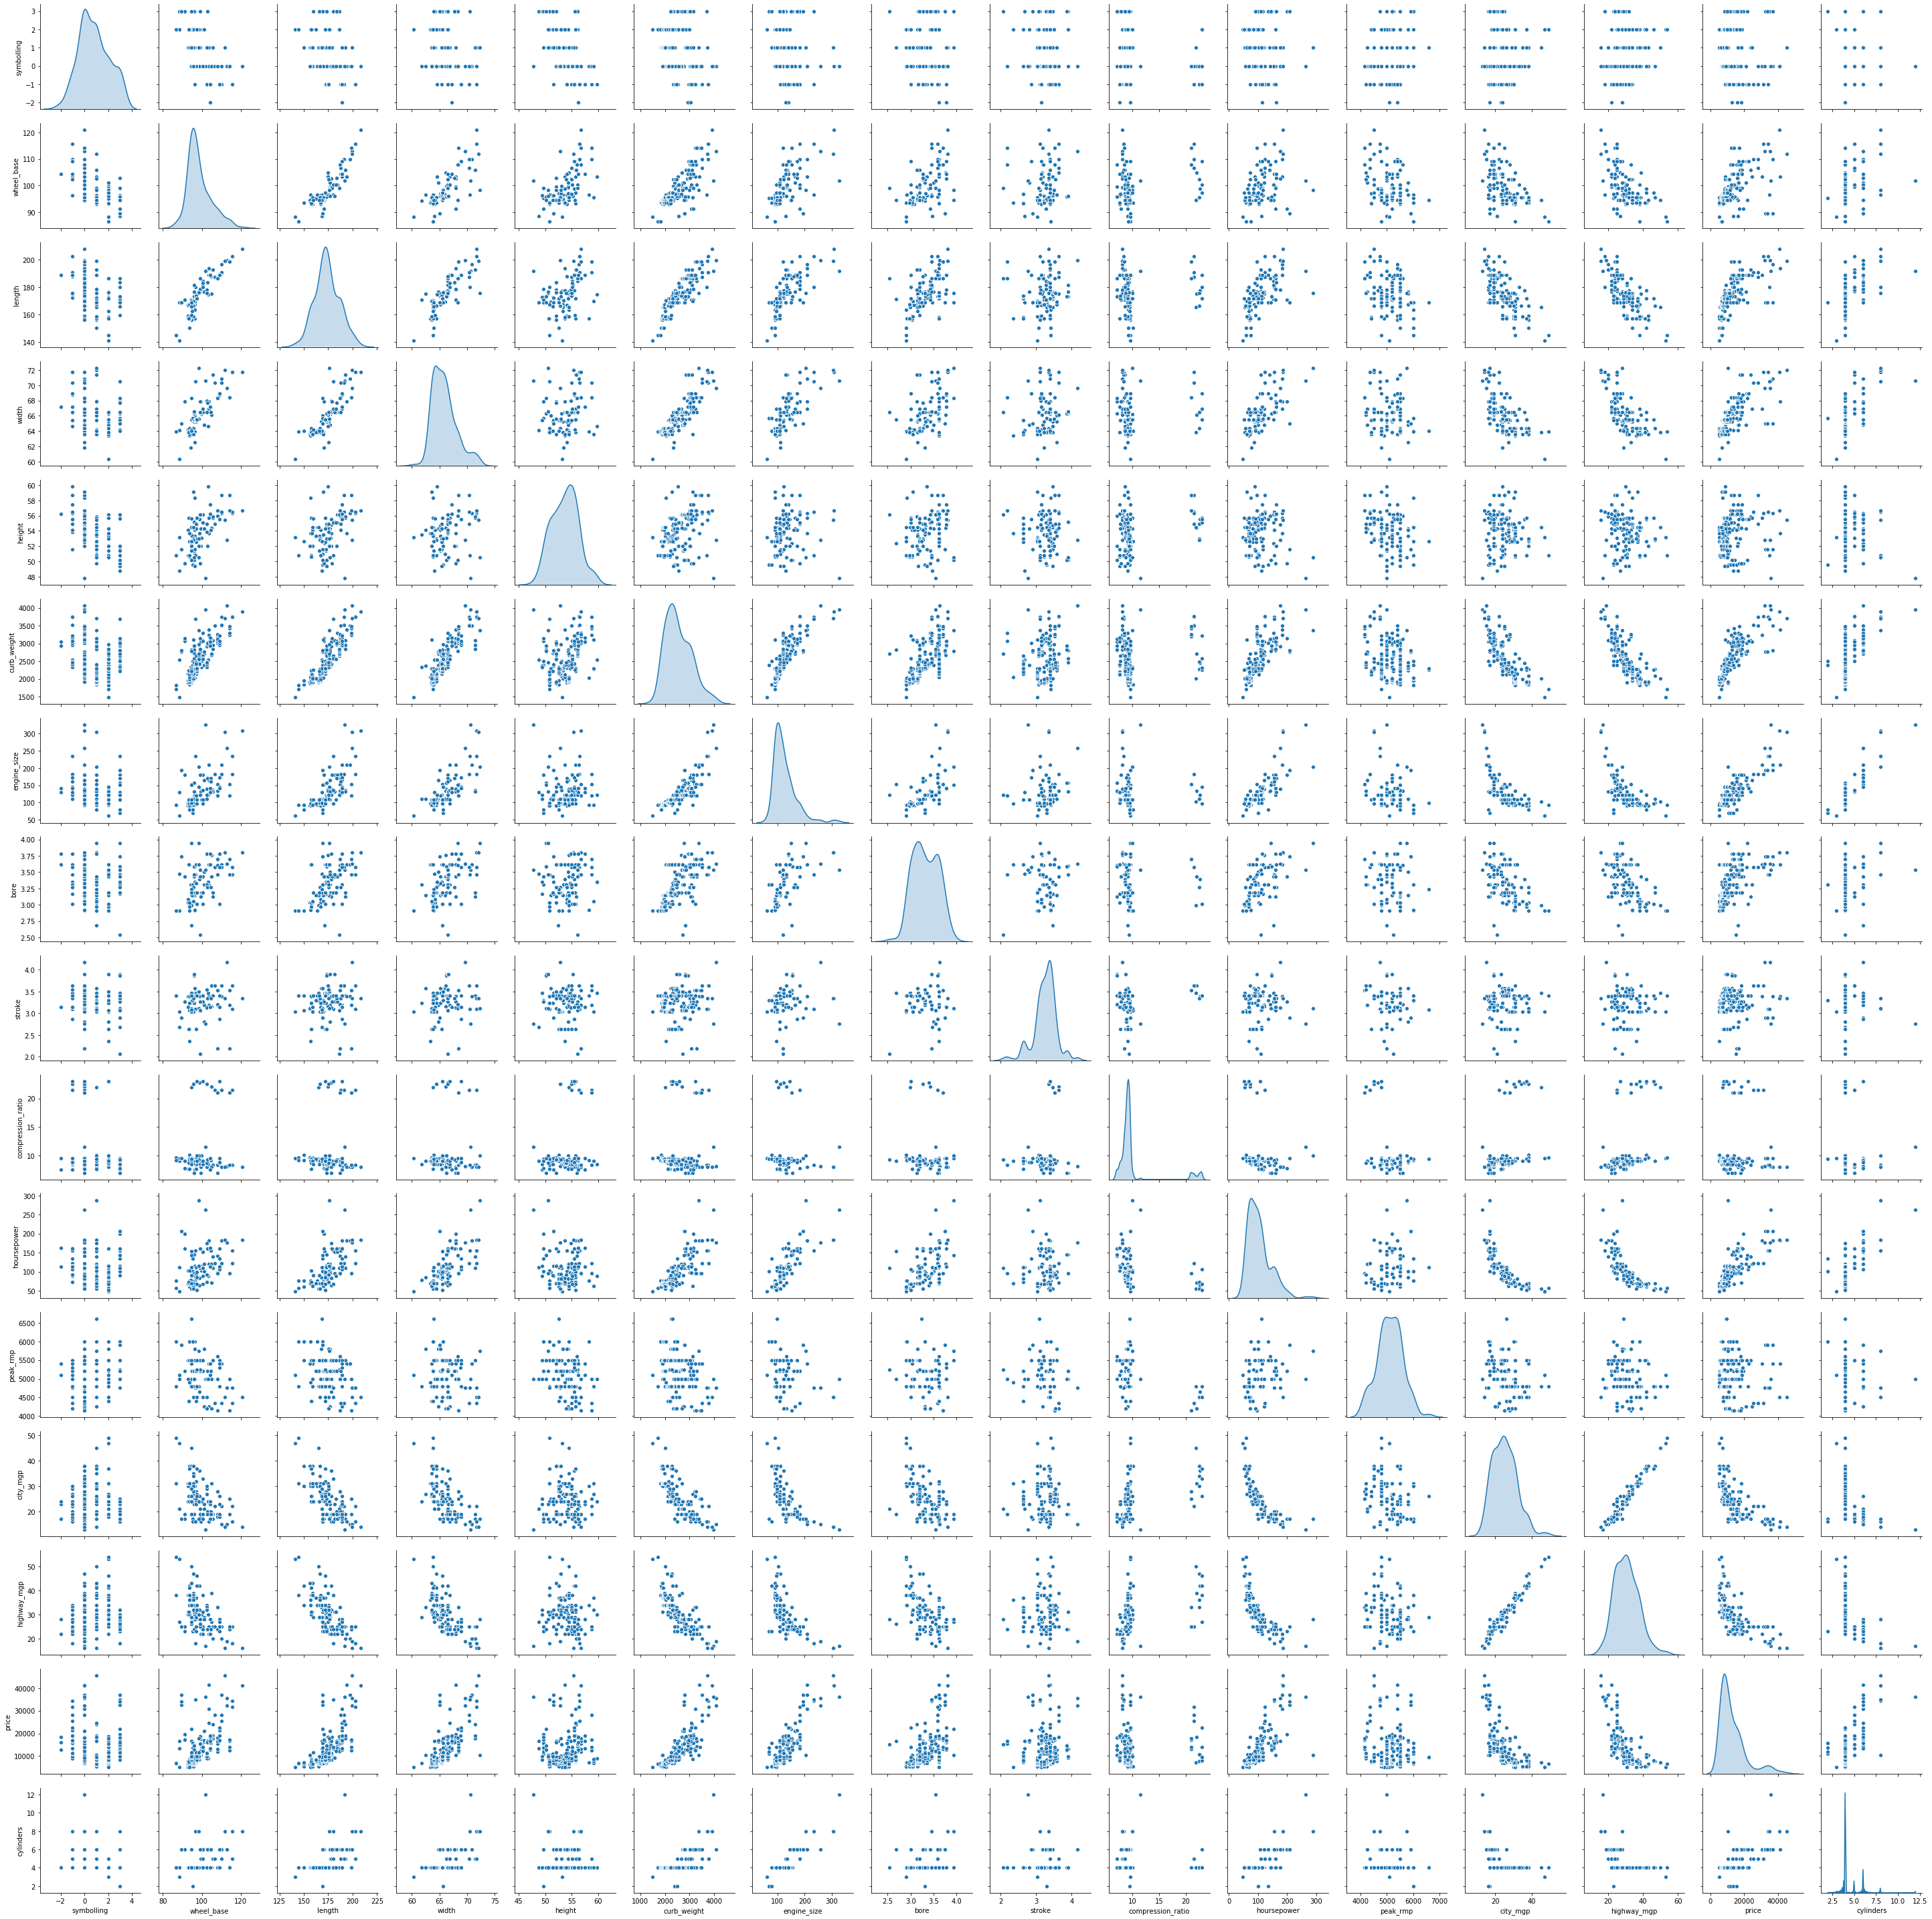

In [29]:
import seaborn as sns
car_df = pd_frame.iloc[:,1:16]

#ns.pairplot(car_df,diag_kind='kde')
sns.pairplot(pd_frame,diag_kind='kde')

In [37]:
X = car_df.drop('price',axis=1)
X = X.drop('num_of_cylinders',axis=1)

y = car_df[['price']]

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [40]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
for idx,col_name in enumerate(X_train.columns):
    print("The coefficent for {} is {} ".format(col_name,regression_model.coef_[0][idx]))

The coefficent for wheel_base is 57.39206609608866 
The coefficent for length is -65.35936287346237 
The coefficent for width is 283.07617528879706 
The coefficent for height is 217.525787037614 
The coefficent for curb_weight is 0.6402616573584227 
The coefficent for engine_size is 154.34498589139878 
The coefficent for bore is -1423.668363120972 
The coefficent for stroke is -2708.795154426694 
The coefficent for compression_ratio is 333.5642037830901 
The coefficent for hoursepower is -24.90485496222379 
The coefficent for peak_rmp is 2.6600375341545126 
The coefficent for city_mgp is -327.75370960714554 
The coefficent for highway_mgp is 8.372475801170447 


In [43]:
intercept = regression_model.intercept_[0]